In [849]:
# Libraries
from __future__ import print_function
import warnings
import os
import io
warnings.filterwarnings("ignore")

#Data Processing
import numpy as np 
import pandas as pd
import itertools

#Machine Learning Algorithms
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Lime
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function

# Scoring function
from sklearn.metrics import roc_auc_score, roc_curve

#Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [733]:
data = np.genfromtxt('/Users/mariafcadena/Desktop/THESIS/DATA/german.data', delimiter=' ', dtype=str)
dataset=pd.DataFrame(data)
dataset.columns=['CheckingAccountStatus',
                 'Duration',
                 'CreditHistory',
                 'Purpose',
                 'CreditAmount',
                 'SavingsAccount',
                 'Employment',
                 'InstallmentRate',
                 'GenderStatus',
                 'Guarantors',
                 'Residence',
                 'Property',
                 'Age',
                 'OtherInstallments',
                 'Housing',
                 'NumCredits',
                 'Job',
                 'NumLiablePeople',
                 'Telephone',
                 'ForeignWorker',
                 'CreditWorthiness']

dataset = dataset.drop('InstallmentRate', axis=1)
dataset = dataset.drop('OtherInstallments', axis=1)
dataset = dataset.drop('Telephone', axis=1)
dataset = dataset.drop('NumLiablePeople', axis=1)
dataset

CheckingAccountStatus Duration CreditHistory Purpose CreditAmount  \
0                     A11        6           A34     A43         1169   
1                     A12       48           A32     A43         5951   
2                     A14       12           A34     A46         2096   
3                     A11       42           A32     A42         7882   
4                     A11       24           A33     A40         4870   
5                     A14       36           A32     A46         9055   
6                     A14       24           A32     A42         2835   
7                     A12       36           A32     A41         6948   
8                     A14       12           A32     A43         3059   
9                     A12       30           A34     A40         5234   
10                    A12       12           A32     A40         1295   
11                    A11       48           A32     A49         4308   
12                    A12       12           A32     A43         1567   
13                    A11       24           A34     A40         1199   
14                    A11       15           A32     A40         1403   
15                    A11       24           A32     A43         1282   
16                    A14       24           A34     A43         2424   
17                    A11       30           A30     A49         8072   
18                    A12       24           A32     A41        12579   
19                    A14       24           A32     A43         3430   
20                    A14        9           A34     A40         2134   
21                    A11        6           A32     A43         2647   
22                    A11       10           A34     A40         2241   
23                    A12       12           A34     A41         1804   
24                    A14       10           A34     A42         2069   
25                    A11        6           A32     A42         1374   
26                    A14        6           A30     A43          426   
27                    A13       12           A31     A43          409   
28                    A12        7           A32     A43         2415   
29                    A11       60           A33     A49         6836   
..                    ...      ...           ...     ...          ...   
970                   A12       15           A32     A45         1514   
971                   A14       24           A32     A40         7393   
972                   A11       24           A31     A40         1193   
973                   A11       60           A32     A49         7297   
974                   A14       30           A34     A43         2831   
975                   A13       24           A32     A43         1258   
976                   A12        6           A32     A43          753   
977                   A12       18           A33     A49         2427   
978                   A14       24           A33     A40         2538   
979                   A12       15           A31     A40         1264   
980                   A12       30           A34     A42         8386   
981                   A14       48           A32     A49         4844   
982                   A13       21           A32     A40         2923   
983                   A11       36           A32     A41         8229   
984                   A14       24           A34     A42         2028   
985                   A11       15           A34     A42         1433   
986                   A13       42           A30     A49         6289   
987                   A14       13           A32     A43         1409   
988                   A11       24           A32     A41         6579   
989                   A12       24           A34     A43         1743   
990                   A14       12           A34     A46         3565   
991                   A14       15           A31     A43         1569   
992                   A11       18           A32     A43      

# Decoding all the Categorical Variables

In [292]:
#Status of existing checking account
dataset['CheckingAccountStatus'] = dataset['CheckingAccountStatus'].replace('A11', '0 DM')
dataset['CheckingAccountStatus'] = dataset['CheckingAccountStatus'].replace('A12', '0 - 200 DM')
dataset['CheckingAccountStatus'] = dataset['CheckingAccountStatus'].replace('A13', '200 DM')
dataset['CheckingAccountStatus'] = dataset['CheckingAccountStatus'].replace('A14', 'NA')

#Credit history
dataset['CreditHistory'] = dataset['CreditHistory'].replace('A30', 'NO CREDITS')
dataset['CreditHistory'] = dataset['CreditHistory'].replace('A31', 'BANK CREDITS PAID DULY')
dataset['CreditHistory'] = dataset['CreditHistory'].replace('A32', 'ALL CREDITS PAID DULY')
dataset['CreditHistory'] = dataset['CreditHistory'].replace('A33', 'DELAY PAYING BEFORE')
dataset['CreditHistory'] = dataset['CreditHistory'].replace('A34', 'CREDITS IN OTHER BANKS')

#Purpose
dataset['Purpose'] = dataset['Purpose'].replace('A40', 'car (new)')
dataset['Purpose'] = dataset['Purpose'].replace('A41', 'car (used)')
dataset['Purpose'] = dataset['Purpose'].replace('A42', 'furniture/equipment')
dataset['Purpose'] = dataset['Purpose'].replace('A43', 'radio/television')
dataset['Purpose'] = dataset['Purpose'].replace('A44', 'domestic appliances')
dataset['Purpose'] = dataset['Purpose'].replace('A45', 'repairs')
dataset['Purpose'] = dataset['Purpose'].replace('A46', 'education')
dataset['Purpose'] = dataset['Purpose'].replace('A47', 'vacation')
dataset['Purpose'] = dataset['Purpose'].replace('A48', 'retraining')
dataset['Purpose'] = dataset['Purpose'].replace('A49', 'business')
dataset['Purpose'] = dataset['Purpose'].replace('A410', 'others')

#Savings account/bonds
dataset['SavingsAccount'] = dataset['SavingsAccount'].replace('A61', '100 DM')
dataset['SavingsAccount'] = dataset['SavingsAccount'].replace('A62', '100 - 500 DM')
dataset['SavingsAccount'] = dataset['SavingsAccount'].replace('A63', '500 - 1000 DM')
dataset['SavingsAccount'] = dataset['SavingsAccount'].replace('A64', '1000 DM')
dataset['SavingsAccount'] = dataset['SavingsAccount'].replace('A65', 'NA')

#Present employment since
dataset['Employment'] = dataset['Employment'].replace('A71', 'unemployed')
dataset['Employment'] = dataset['Employment'].replace('A72', '1 year')
dataset['Employment'] = dataset['Employment'].replace('A73', '1 - 4 years')
dataset['Employment'] = dataset['Employment'].replace('A74', '4 - 7 years')
dataset['Employment'] = dataset['Employment'].replace('A75', '7 years')

#Personal status and sex
dataset['GenderStatus'] = dataset['GenderStatus'].replace('A91', 'male : divorced/separated')
dataset['GenderStatus'] = dataset['GenderStatus'].replace('A92', 'female : divorced/separated/married')
dataset['GenderStatus'] = dataset['GenderStatus'].replace('A93', 'male : single')
dataset['GenderStatus'] = dataset['GenderStatus'].replace('A94', 'male : married/widowed')
dataset['GenderStatus'] = dataset['GenderStatus'].replace('A95', 'female : single')

#Other debtors / guarantors
dataset['Guarantors'] = dataset['Guarantors'].replace('A101', 'none')
dataset['Guarantors'] = dataset['Guarantors'].replace('A102', 'co-applicant')
dataset['Guarantors'] = dataset['Guarantors'].replace('A103', 'guarantor')

#Property
dataset['Property'] = dataset['Property'].replace('A121', 'real estate')
dataset['Property'] = dataset['Property'].replace('A122', 'life insurance')
dataset['Property'] = dataset['Property'].replace('A123', 'car or other')
dataset['Property'] = dataset['Property'].replace('A124', 'unknown/none')

#Housing
dataset['Housing'] = dataset['Housing'].replace('A151', 'rent')
dataset['Housing'] = dataset['Housing'].replace('A152', 'own')
dataset['Housing'] = dataset['Housing'].replace('A153', 'for free')

#Job
dataset['Job'] = dataset['Job'].replace('A171', 'non-resident')
dataset['Job'] = dataset['Job'].replace('A172', 'unemployed')
dataset['Job'] = dataset['Job'].replace('A173', 'employee')
dataset['Job'] = dataset['Job'].replace('A174', 'management')

#Foreign worker
dataset['ForeignWorker'] = dataset['ForeignWorker'].replace('A201', '0')
dataset['ForeignWorker'] = dataset['ForeignWorker'].replace('A202', '1')

#Foreign worker
dataset['CreditWorthiness'] = dataset['CreditWorthiness'].replace('1', '1')
dataset['CreditWorthiness'] = dataset['CreditWorthiness'].replace('2', '0')
dataset['CreditWorthiness'] = dataset['CreditWorthiness'].apply(pd.to_numeric)

dataset.head()

CheckingAccountStatus Duration           CreditHistory              Purpose  \
0                  0 DM        6  CREDITS IN OTHER BANKS     radio/television   
1            0 - 200 DM       48   ALL CREDITS PAID DULY     radio/television   
2                    NA       12  CREDITS IN OTHER BANKS            education   
3                  0 DM       42   ALL CREDITS PAID DULY  furniture/equipment   
4                  0 DM       24     DELAY PAYING BEFORE            car (new)   

  CreditAmount SavingsAccount   Employment  \
0         1169             NA      7 years   
1         5951         100 DM  1 - 4 years   
2         2096         100 DM  4 - 7 years   
3         7882         100 DM  4 - 7 years   
4         4870         100 DM  1 - 4 years   

                          GenderStatus Guarantors Residence        Property  \
0                        male : single       none         4     real estate   
1  female : divorced/separated/married       none         2     real estate   
2                        male : single       none         3     real estate   
3                        male : single  guarantor         4  life insurance   
4                        male : single       none         4    unknown/none   

  Age   Housing NumCredits         Job ForeignWorker  CreditWorthiness  
0  67       own          2    employee             0                 1  
1  22       own          1    employee             0                 0  
2  49       own          1  unemployed             0                 1  
3  45  for free          1    employee             0                 1  
4  53  for free          2    employee             0                 0

In [671]:
dataset

CheckingAccountStatus  Duration           CreditHistory  \
0                    0 DM         6  CREDITS IN OTHER BANKS   
1              0 - 200 DM        48   ALL CREDITS PAID DULY   
2                      NA        12  CREDITS IN OTHER BANKS   
3                    0 DM        42   ALL CREDITS PAID DULY   
4                    0 DM        24     DELAY PAYING BEFORE   
5                      NA        36   ALL CREDITS PAID DULY   
6                      NA        24   ALL CREDITS PAID DULY   
7              0 - 200 DM        36   ALL CREDITS PAID DULY   
8                      NA        12   ALL CREDITS PAID DULY   
9              0 - 200 DM        30  CREDITS IN OTHER BANKS   
10             0 - 200 DM        12   ALL CREDITS PAID DULY   
11                   0 DM        48   ALL CREDITS PAID DULY   
12             0 - 200 DM        12   ALL CREDITS PAID DULY   
13                   0 DM        24  CREDITS IN OTHER BANKS   
14                   0 DM        15   ALL CREDITS PAID DULY   
15                   0 DM        24   ALL CREDITS PAID DULY   
16                     NA        24  CREDITS IN OTHER BANKS   
17                   0 DM        30              NO CREDITS   
18             0 - 200 DM        24   ALL CREDITS PAID DULY   
19                     NA        24   ALL CREDITS PAID DULY   
20                     NA         9  CREDITS IN OTHER BANKS   
21                   0 DM         6   ALL CREDITS PAID DULY   
22                   0 DM        10  CREDITS IN OTHER BANKS   
23             0 - 200 DM        12  CREDITS IN OTHER BANKS   
24                     NA        10  CREDITS IN OTHER BANKS   
25                   0 DM         6   ALL CREDITS PAID DULY   
26                     NA         6              NO CREDITS   
27                 200 DM        12  BANK CREDITS PAID DULY   
28             0 - 200 DM         7   ALL CREDITS PAID DULY   
29                   0 DM        60     DELAY PAYING BEFORE   
..                    ...       ...                     ...   
970            0 - 200 DM        15   ALL CREDITS PAID DULY   
971                    NA        24   ALL CREDITS PAID DULY   
972                  0 DM        24  BANK CREDITS PAID DULY   
973                  0 DM        60   ALL CREDITS PAID DULY   
974                    NA        30  CREDITS IN OTHER BANKS   
975                200 DM        24   ALL CREDITS PAID DULY   
976            0 - 200 DM         6   ALL CREDITS PAID DULY   
977            0 - 200 DM        18     DELAY PAYING BEFORE   
978                    NA        24     DELAY PAYING BEFORE   
979            0 - 200 DM        15  BANK CREDITS PAID DULY   
980            0 - 200 DM        30  CREDITS IN OTHER BANKS   
981                    NA        48   ALL CREDITS PAID DULY   
982                200 DM        21   ALL CREDITS PAID DULY   
983                  0 DM        36   ALL CREDITS PAID DULY   
984                    NA        24  CREDITS IN OTHER BANKS   
985                  0 DM        15  CREDITS IN OTHER BANKS   
986                200 DM        42              NO CREDITS   
987                    NA        13   ALL CREDITS PAID DULY   
988                  0 DM        24   ALL CREDITS PAID DULY   
989            0 - 200 DM        24  CREDITS IN OTHER BANKS   
990                    NA        12  CREDITS IN OTHER BANKS   
991                    NA        15  BANK CREDITS PAID DULY   
992                  0 DM        18   ALL CREDITS PAID DULY   
993                  0 DM        36   ALL CREDITS PAID DULY   
994                    NA        12   ALL CREDITS PAID DULY   
995                    NA        12   ALL CREDITS PAID DULY   
996                  0 DM        30   ALL CREDITS PAID DULY   
997                    NA        12   ALL CREDITS PAID DULY   
998                  0 DM        45   ALL CREDITS PAID DULY   
999            0 - 200 DM        45  CREDITS IN OTHER BANKS   

                 Purpose  CreditAmount SavingsAccount   Employment  \
0       radio/television   

In [293]:
target_col = ["CreditWorthiness"]
num_cols   = ['Duration',
              'CreditAmount',
              'Residence',
              'Age',
              'NumCredits']
cat_cols   = [x for x in dataset.columns if x not in num_cols + target_col]
dataset[num_cols] = dataset[num_cols].apply(pd.to_numeric)

In [294]:
#Separating Customers worth of crediat loans for not worth
worth     = dataset[dataset["CreditWorthiness"] == 1]
not_worth = dataset[dataset["CreditWorthiness"] == 0]

In [295]:
# View the dimension of the dataset
dataset.shape

(1000, 17)

In [296]:
# Checking for unique value in the data attributes
dataset.nunique()

CheckingAccountStatus      4
Duration                  33
CreditHistory              5
Purpose                   10
CreditAmount             921
SavingsAccount             5
Employment                 5
GenderStatus               4
Guarantors                 3
Residence                  4
Property                   4
Age                       53
Housing                    3
NumCredits                 4
Job                        4
ForeignWorker              2
CreditWorthiness           2
dtype: int64

In [297]:
# Describe the all statistical properties of the training dataset
dataset[num_cols].describe()

Duration  CreditAmount    Residence          Age   NumCredits
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000
mean     20.903000   3271.258000     2.845000    35.546000     1.407000
std      12.058814   2822.736876     1.103718    11.375469     0.577654
min       4.000000    250.000000     1.000000    19.000000     1.000000
25%      12.000000   1365.500000     2.000000    27.000000     1.000000
50%      18.000000   2319.500000     3.000000    33.000000     1.000000
75%      24.000000   3972.250000     4.000000    42.000000     2.000000
max      72.000000  18424.000000     4.000000    75.000000     4.000000

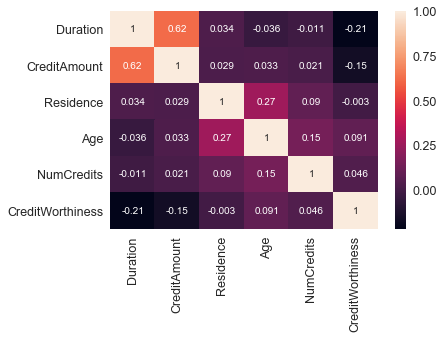

In [298]:
sns.heatmap(dataset.corr(), annot=True)

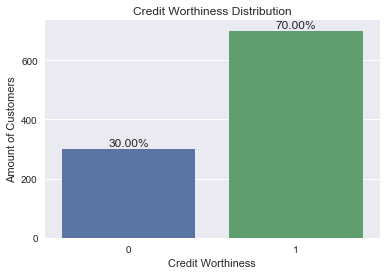

In [224]:
# Graphical representation of the percentage of credit worthiness in the dataset
total_len = len(dataset['CreditWorthiness'])
sns.set()
sns.countplot(dataset.CreditWorthiness).set_title('Credit Worthiness Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Credit Worthiness")
ax.set_ylabel("Amount of Customers")
plt.show()

This means that for this specific set of customers the approval rate is of 70% (. Its a normal rate in the industry, but it is important to take this ratio in account because in terms of the algorithm it could mean that the outcome variable is imbalanced. 

In [225]:
#function  for pie plot for customer attrition types
def plot_dstrb(column) :    
    trace1 = go.Pie(values  = worth[column].value_counts().values.tolist(),
                    labels  = worth[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent",
                    domain  = dict(x = [0,.48]),
                    name    = "Approved Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_worth[column].value_counts().values.tolist(),
                    labels  = not_worth[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Denied Customers" 
                   )


    layout = go.Layout(dict(title = "Customer Credit Worthiness distribution per " + column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Approved Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Denied Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [226]:
for i in cat_cols:
    plot_dstrb(i)

In [546]:
#column=0
CrossTab_Var   = pd.crosstab(dataset['CreditHistory'], dataset.CreditWorthiness)#, normalize='index')
#CrossTab_Churn = pd.crosstab(dataset.CreditWorthiness,dataset[dataset.columns[column]], normalize='index')
CrossTab_Var

CreditWorthiness          0    1
CreditHistory                   
ALL CREDITS PAID DULY   169  361
BANK CREDITS PAID DULY   28   21
CREDITS IN OTHER BANKS   50  243
DELAY PAYING BEFORE      28   60
NO CREDITS               25   15

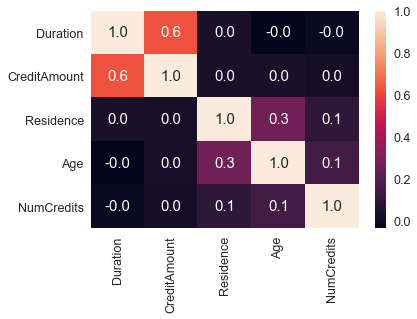

In [228]:
#Finding correlations
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(dataset[num_cols].corr(), annot = True,fmt = ".1f")
plt.show()

In [229]:
#function  for histogram for customer churn types
def histogram(column) :
    trace1 = go.Histogram(x  = worth[column],
                          histnorm= "percent",
                          name = "Approved Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_worth[column],
                          histnorm = "percent",
                          name = "Denied Customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in Credit Worthiness ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

There is a strong correlation between the duration and the credit amount which is makes sense given the customers ability to pay and what is feasible as a monthly installament.

In [547]:
histogram('NumCredits')

In [231]:
# One-Hot encoding our categorical attributes
training_data = pd.get_dummies(dataset, columns = cat_cols, prefix = cat_cols)
training_data.head()

Duration  CreditAmount  Residence  Age  NumCredits  CreditWorthiness  \
0         6          1169          4   67           2                 1   
1        48          5951          2   22           1                 0   
2        12          2096          3   49           1                 1   
3        42          7882          4   45           1                 1   
4        24          4870          4   53           2                 0   

   CheckingAccountStatus_0 - 200 DM  CheckingAccountStatus_0 DM  \
0                                 0                           1   
1                                 1                           0   
2                                 0                           0   
3                                 0                           1   
4                                 0                           1   

   CheckingAccountStatus_200 DM  CheckingAccountStatus_NA       ...         \
0                             0                         0       ...          
1                             0                         0       ...          
2                             0                         1       ...          
3                             0                         0       ...          
4                             0                         0       ...          

   Property_unknown/none  Housing_for free  Housing_own  Housing_rent  \
0                      0                 0            1             0   
1                      0                 0            1             0   
2                      0                 0            1             0   
3                      0                 1            0             0   
4                      1                 1            0             0   

   Job_employee  Job_management  Job_non-resident  Job_unemployed  \
0             1               0                 0               0   
1             1               0                 0               0   
2             0               0                 0               1   
3             1               0                 0               0   
4             1               0                 0               0   

   ForeignWorker_0  ForeignWorker_1  
0                1                0  
1                1                0  
2                1                0  
3                1                0  
4                1                0  

[5 rows x 55 columns]

# Feature Selection

In [405]:
X = training_data.drop('CreditWorthiness', axis=1)
y = training_data.CreditWorthiness
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
sel = SelectFromModel(forest)
sel.fit(X, y)
sel.get_support()
selected_feat= X.columns[(sel.get_support())]
print(selected_feat)
print(len(selected_feat))

#indices = np.argsort(importances)[::-1]
#for i in range(X.shape[1]):
 #   print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

Index(['Duration', 'CreditAmount', 'Residence', 'Age', 'NumCredits',
       'CheckingAccountStatus_0 DM', 'CheckingAccountStatus_NA',
       'CreditHistory_CREDITS IN OTHER BANKS', 'Purpose_car (new)',
       'SavingsAccount_100 DM'],
      dtype='object')
10


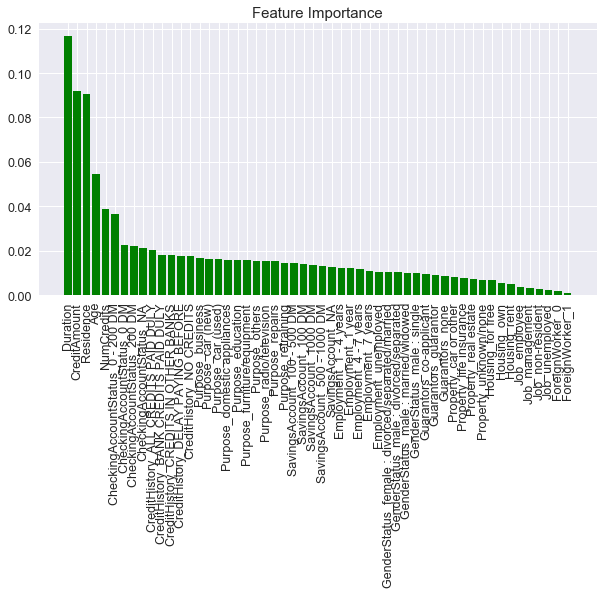

In [406]:
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.rcParams["figure.figsize"] = [10,5]
plt.show()

In [407]:
Relevant_Features =['Duration',  
                    'Residence', 
                    'Age', 
                    'NumCredits',
                    'CheckingAccountStatus_0 DM', 
                    'CheckingAccountStatus_NA',
                    'CreditHistory_CREDITS IN OTHER BANKS', 
                    'Purpose_car (new)',
                    'SavingsAccount_100 DM']
X_prediction=X[Relevant_Features]

# Splitting in Training and Testing Data

## Data for interpretable models

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X_prediction, y, test_size = 0.25)
X_test = X_test.as_matrix()
X_train = X_train.as_matrix()

## Data for Black-box models

In [601]:
labels = y.values
le= sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_
relevant_columns=['Duration',  
                  'Residence', 
                  'Age', 
                  'NumCredits',
                  'CheckingAccountStatus', 
                  'CreditHistory', 
                  'Purpose',
                  'SavingsAccount']
data=dataset[relevant_columns]
feature_names=list(data.columns) 
data=data.as_matrix()
categorical_features = [4,5,6,7]
categorical_names = {}
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_
data = data.astype(float)
encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=categorical_features)
np.random.seed(1)
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data, labels, train_size=0.80)
encoder.fit(data)
encoded_train = encoder.transform(train)

In [604]:
categorical_names

{4: array(['0 - 200 DM', '0 DM', '200 DM', 'NA'], dtype=object),
 5: array(['ALL CREDITS PAID DULY', 'BANK CREDITS PAID DULY',
        'CREDITS IN OTHER BANKS', 'DELAY PAYING BEFORE', 'NO CREDITS'],
       dtype=object),
 6: array(['business', 'car (new)', 'car (used)', 'domestic appliances',
        'education', 'furniture/equipment', 'others', 'radio/television',
        'repairs', 'retraining'], dtype=object),
 7: array(['100 - 500 DM', '100 DM', '1000 DM', '500 - 1000 DM', 'NA'],
       dtype=object)}

## K-Nearest Neighbors

In [513]:
# Initialization of the KNN
knMod = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2,
                             metric = 'minkowski', metric_params = None)
# Fitting the model with training data 
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Logistic Regression

In [532]:
# Initialization of the Logistic Regression
lrMod = LogisticRegression( penalty = 'l2', dual = False, tol = 0.001, C = 1.0, fit_intercept = True,
                            intercept_scaling = 1, class_weight = None, 
                            random_state = None, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)
# Fitting the model with training data 
lrMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.001,
          verbose=2, warm_start=False)

In [548]:
lrMod.coef_

array([[-0.03935752, -0.04107217,  0.0211671 , -0.11954563, -0.56124799,
         1.31603373,  1.08852911, -0.7357753 , -0.51212931]])

In [554]:
y_pred = lrMod.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lrMod.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [559]:
y_pred = lrMod.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lrMod.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [558]:
intercept

array([1.32008677])

## Adaboost

In [713]:
# Initialization of the AdaBoost model
adaMod = AdaBoostClassifier(base_estimator = None, n_estimators = 32, learning_rate = 1.0)
# Fitting the model with training data 
adaMod.fit(encoded_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=32, random_state=None)

In [714]:
print('Accuracy of Adaboost classifier on test set: {:.2f}'.format(sklearn.metrics.accuracy_score(labels_test, adaMod.predict(encoder.transform(test)))))

Accuracy of Adaboost classifier on test set: 0.74


In [727]:
adaMod.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=567838713, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1200532607, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_le

In [636]:
Features=[  'Duration'
            ,'Residence'
            ,'Age'
            ,'NumCredits'
            ,'0 - 200 DM'
            ,'0 DM'
            ,'200 DM'
            ,'NA'
            ,'ALL CREDITS PAID DULY'
            ,'BANK CREDITS PAID DULY'
            ,'CREDITS IN OTHER BANKS'
            ,'DELAY PAYING BEFORE'
            ,'NO CREDITS'
            ,'business'
            ,'car (new)'
            ,'car (used)'
            ,'domestic appliances'
            ,'education'
            ,'furniture/equipment'
            ,'others'
            ,'radio/television'
            ,'repairs'
            ,'retraining'
            ,'100 - 500 DM'
            ,'100 DM'
            ,'1000 DM'
            ,'500 - 1000 DM'
            ,'NA']
Data = {'Features':  Features}
df = pd.DataFrame (Data, columns = ['Features'])
df['Importances']=rfMod.feature_importances_
df

Features  Importances
0                 Duration     0.023133
1                Residence     0.047088
2                      Age     0.011829
3               NumCredits     0.060708
4               0 - 200 DM     0.023322
5                     0 DM     0.015631
6                   200 DM     0.032923
7                       NA     0.015034
8    ALL CREDITS PAID DULY     0.020802
9   BANK CREDITS PAID DULY     0.018176
10  CREDITS IN OTHER BANKS     0.029889
11     DELAY PAYING BEFORE     0.021362
12              NO CREDITS     0.003978
13                business     0.012927
14               car (new)     0.023369
15              car (used)     0.004559
16     domestic appliances     0.024854
17               education     0.010240
18     furniture/equipment     0.003003
19                  others     0.016679
20        radio/television     0.031318
21                 repairs     0.009381
22              retraining     0.010728
23            100 - 500 DM     0.019544
24                  100 DM     0.180608
25                 1000 DM     0.079595
26           500 - 1000 DM     0.209494
27                      NA     0.039828

## Gradient Boost

In [728]:
# Initialization of the GradientBoosting model
gbMod = GradientBoostingClassifier(loss = 'deviance', n_estimators = 16)
# Fitting the model with training data 
gbMod.fit(encoded_train, labels_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=16,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

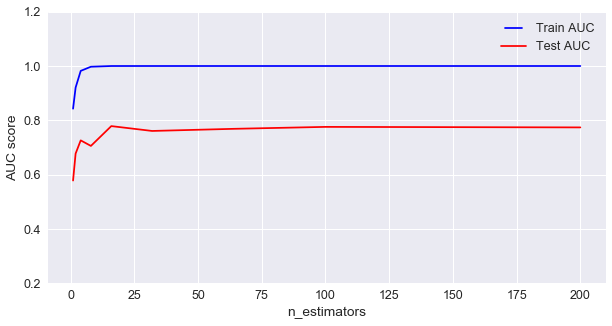

In [726]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=estimator, criterion='gini')
    model.fit(encoded_train, labels_train)
    train_labels = model.predict_proba(encoder.transform(train))[:,1]
    roc_auc = roc_auc_score(labels_train, train_labels , average = 'macro')
    train_results.append(roc_auc)
    test_labels = model.predict_proba(encoder.transform(test))[:,1]
    roc_auc = roc_auc_score(labels_test, test_labels , average = 'macro')
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
axes = plt.gca()
axes.set_ylim([0.2,1.2])
plt.show()

## Random Forest

In [729]:
# Initialization of the Random Forest model
rfMod = RandomForestClassifier(n_estimators=100, criterion='gini')
# Fitting the model with training data 
rfMod.fit(encoded_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [571]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(sklearn.metrics.accuracy_score(labels_test, rfMod.predict(encoder.transform(test)))))

Accuracy of Random Forest classifier on test set: 0.77


In [732]:
rfMod.feature_importances_

array([0.02193299, 0.03890987, 0.01115316, 0.06761618, 0.0240691 ,
       0.01621179, 0.03293822, 0.01505063, 0.01913331, 0.01836299,
       0.02983741, 0.02233554, 0.00343555, 0.01369242, 0.02408085,
       0.00418058, 0.02492107, 0.00870166, 0.00332759, 0.01894387,
       0.030608  , 0.0105368 , 0.01006841, 0.0226488 , 0.18516888,
       0.08062954, 0.20420125, 0.03730352])

## Neural Networks

In [497]:
import keras
from keras import Sequential
from keras.layers import Dense

In [507]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=9))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [508]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [509]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6777 - acc: 0.6987
Epoch 2/100
750/750 [==============================] - 0s 284us/step - loss: 0.6215 - acc: 0.7053
Epoch 3/100
750/750 [==============================] - 0s 300us/step - loss: 0.6043 - acc: 0.7053
Epoch 4/100
750/750 [==============================] - 0s 247us/step - loss: 0.5953 - acc: 0.7053
Epoch 5/100
750/750 [==============================] - 0s 245us/step - loss: 0.5877 - acc: 0.7080
Epoch 6/100
750/750 [==============================] - 0s 261us/step - loss: 0.5800 - acc: 0.7040
Epoch 7/100
750/750 [==============================] - 0s 234us/step - loss: 0.5735 - acc: 0.7107
Epoch 8/100
750/750 [==============================] - 0s 249us/step - loss: 0.5700 - acc: 0.7093
Epoch 9/100
750/750 [==============================] - 0s 266us/step - loss: 0.5665 - acc: 0.7067
Epoch 10/100
750/750 [==============================] - 0s 246us/step - loss: 0.5638 - acc: 0.7107
Epoch 11/100
750/750 

750/750 [==============================] - 0s 217us/step - loss: 0.4968 - acc: 0.7533
Epoch 84/100
750/750 [==============================] - 0s 265us/step - loss: 0.4976 - acc: 0.7493
Epoch 85/100
750/750 [==============================] - 0s 239us/step - loss: 0.4980 - acc: 0.7493
Epoch 86/100
750/750 [==============================] - 0s 240us/step - loss: 0.4981 - acc: 0.7493
Epoch 87/100
750/750 [==============================] - 0s 262us/step - loss: 0.4973 - acc: 0.7440
Epoch 88/100
750/750 [==============================] - 0s 220us/step - loss: 0.4998 - acc: 0.7373
Epoch 89/100
750/750 [==============================] - 0s 260us/step - loss: 0.4976 - acc: 0.7493
Epoch 90/100
750/750 [==============================] - 0s 283us/step - loss: 0.4973 - acc: 0.7533
Epoch 91/100
750/750 [==============================] - 0s 239us/step - loss: 0.4987 - acc: 0.7413
Epoch 92/100
750/750 [==============================] - 0s 221us/step - loss: 0.4957 - acc: 0.7533
Epoch 93/100
750/750 [=

In [514]:
eval_model=classifier.evaluate(X_test, y_test)
eval_model

250/250 [==============================] - 0s 682us/step


[0.5705500659942627, 0.7159999980926514]

# Testing the baseline model

## K-Nearest Neighbor (KNN)

In [536]:
# Compute the model accuracy on the given test data and labels
knn_acc = knMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = knMod.predict_proba(X_test)[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
knn_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

## Logistic Regression

In [537]:
# Compute the model accuracy on the given test data and labels
lr_acc = lrMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = lrMod.predict_proba(X_test)[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

## AdaBoost

In [715]:
# Compute the model accuracy on the given test data and labels
ada_acc = sklearn.metrics.accuracy_score(labels_test, adaMod.predict(encoder.transform(test)))
# Return probability estimates for the test data
test_labels = adaMod.predict_proba(encoder.transform(test))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
ada_roc_auc = roc_auc_score(labels_test, test_labels , average = 'macro')

## GradientBoost

In [709]:
# Compute the model accuracy on the given test data and labels
gb_acc = sklearn.metrics.accuracy_score(labels_test, gbMod.predict(encoder.transform(test)))
# Return probability estimates for the test data
test_labels = gbMod.predict_proba(encoder.transform(test))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
gb_roc_auc = roc_auc_score(labels_test, test_labels , average = 'macro')

## Random Forest

In [720]:
# Compute the model accuracy on the given test data and labels
rf_acc = sklearn.metrics.accuracy_score(labels_test, rfMod.predict(encoder.transform(test)))
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(encoder.transform(test))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(labels_test, test_labels , average = 'macro')

## Model Comparison

In [721]:
models = ['Logistic Regression', 'AdaBoost', 'GradientBoosting', 'Random Forest']
accuracy = [lr_acc*100, ada_acc*100, gb_acc*100, rf_acc*100]
roc_auc = [lr_roc_auc *100, ada_roc_auc*100, gb_roc_auc*100, rf_roc_auc*100]

d = {'accuracy %': accuracy, 'roc_auc %': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

accuracy %  roc_auc %
Logistic Regression        69.6  70.611440
AdaBoost                   74.5  72.761149
GradientBoosting           74.0  76.367352
Random Forest              75.0  77.533357

In [644]:
#Logistic Regression
fpr_lr, tpr_lr, _   = roc_curve(y_test, lrMod.predict_proba(X_test)[:,1])
#Adaboost
fpr_ada, tpr_ada, _ = roc_curve(labels_test,adaMod.predict_proba(encoder.transform(test))[:,1])
#Gradient Boost
fpr_gb, tpr_gb, _   = roc_curve(labels_test, gbMod.predict_proba(encoder.transform(test))[:,1])
#Random Forest
fpr_rf, tpr_rf, _   = roc_curve(labels_test, rfMod.predict_proba(encoder.transform(test))[:,1])

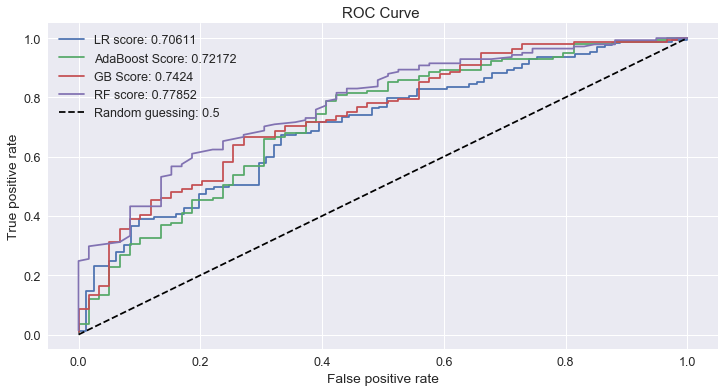

In [645]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(gb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

# LIME to interpret the result of the "Black Box Algorithms"

In [148]:
np.random.seed(1)
labels = y.values
le= sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_
data = X

In [158]:
data=X.values
categorical_names = {}
categorical_features=[]
cats = X.nunique()[X.nunique() < 6].keys().tolist()
for feature in cats:
    n_col= X.columns.get_loc(feature)
    categorical_features.append(n_col)
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data[:, n_col])
    data[:, n_col] = le.transform(data[:, n_col])
    categorical_names[n_col] = le.classes_

In [444]:
relevant_columns=['Duration',  
             'Residence', 
             'Age', 
             'NumCredits',
             'CheckingAccountStatus', 
             'CreditHistory', 
             'Purpose',
             'SavingsAccount']
data=dataset[relevant_columns]
data=data.values
categorical_names = {}
categorical_features=[]
cats = ['CheckingAccountStatus','CreditHistory', 'Purpose','SavingsAccount']
#for feature in cats:
n_col= dataset.columns.get_loc('CheckingAccountStatus')
categorical_features.append(n_col)
le = sklearn.preprocessing.LabelEncoder()
le.fit(data[:, n_col])
data[:, n_col] = le.transform(data[:, n_col])
categorical_names[n_col] = le.classes_
categorical_names[0]
#data[:,0]

array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24,
       26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 54, 60, 72],
      dtype=object)

In [469]:
data=data.astype(float)

In [470]:
encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=categorical_features)

In [471]:
np.random.seed(1)
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data, labels, test_size=0.20)

In [472]:
encoder.fit(data)
encoder_train=encoder.transform(train)

In [473]:
explainer = lime.lime_tabular.LimeTabularExplainer(train ,feature_names = feature_names,class_names=class_names,
                                                   categorical_features=categorical_features, 
                                                   categorical_names=categorical_names, kernel_width=3)

In [474]:
encoder.fit(data)
encoded_train = encoder.transform(train)

## Adaboost

In [522]:

sklearn.metrics.accuracy_score(labels_test, adaMod.predict(encoder.transform(test)))

0.745

In [841]:
adaMod_fn = lambda x: adaMod.predict_proba(encoder.transform(x)).astype(float)
explainer_adaMod = lime.lime_tabular.LimeTabularExplainer(train ,feature_names = feature_names,class_names=class_names,
                                                   categorical_features=categorical_features, 
                                                   categorical_names=categorical_names, kernel_width=3)
np.random.seed(1)
i = 4
exp_adaMod = explainer_adaMod.explain_instance(test[i], adaMod_fn, num_features=14)
exp_adaMod.show_in_notebook(show_all=True)

## Gradientboost

In [845]:
sklearn.metrics.accuracy_score(labels_test, gbMod.predict(encoder.transform(test)))

0.74

In [846]:
gbMod_fn = lambda x: gbMod.predict_proba(encoder.transform(x)).astype(float)
explainer_gbMod = lime.lime_tabular.LimeTabularExplainer(train ,feature_names = feature_names,class_names=class_names,
                                                   categorical_features=categorical_features, 
                                                   categorical_names=categorical_names, kernel_width=3)
np.random.seed(1)
i = 35
exp_gbMod = explainer_gbMod.explain_instance(test[i], gbMod_fn, num_features=14)
exp_gbMod.show_in_notebook(show_all=False)

## Random Forest

In [842]:
odor_idx = feature_names.index('SavingsAccount')
explainer.feature_frequencies[odor_idx]

array([0.09625, 0.6025 , 0.05125, 0.0625 , 0.1875 ])

In [835]:
rfMod_fn = lambda x: rfMod.predict_proba(encoder.transform(x)).astype(float)
explainer_rfMod = lime.lime_tabular.LimeTabularExplainer(train ,feature_names = feature_names,class_names=class_names,
                                                   categorical_features=categorical_features, 
                                                   categorical_names=categorical_names, kernel_width=3)
np.random.seed(1)
i = 142
exp_rfMod = explainer_rfMod.explain_instance(test[i], rfMod_fn, num_features=14)
exp_rfMod.show_in_notebook(show_all=False)

In [826]:
resultados=pd.DataFrame(labels_test)
resultados.columns=['labels']
ada=pd.DataFrame(adaMod.predict_proba(encoder.transform(test)))
ada.columns=['ada_0','ada_1']
resultados['ada_0']=ada['ada_0']
ada=pd.DataFrame(gbMod.predict_proba(encoder.transform(test)))
ada.columns=['gb_0','gb_1']
resultados['gb_0']=ada['gb_0']
ada=pd.DataFrame(rfMod.predict_proba(encoder.transform(test)))
ada.columns=['rf_0','rf_1']
resultados['rf_0']=ada['rf_0']
resultados[resultados['ada_0']>0.5]

labels     ada_0      gb_0  rf_0
1         1  0.500849  0.542225  0.42
3         0  0.503404  0.542225  0.40
4         0  0.511777  0.573301  0.68
5         1  0.504087  0.508794  0.73
10        0  0.507035  0.577555  0.42
11        1  0.501594  0.542225  0.52
21        0  0.502819  0.354378  0.54
35        0  0.503698  0.542225  0.56
43        1  0.500861  0.450320  0.37
52        0  0.501594  0.590153  0.85
56        0  0.504756  0.424688  0.84
57        0  0.503021  0.404460  0.75
62        1  0.503786  0.365669  0.37
64        0  0.503404  0.542225  0.37
68        0  0.501594  0.542225  0.53
69        1  0.509077  0.575789  0.57
76        0  0.509878  0.437319  0.54
84        0  0.504320  0.590153  0.69
88        1  0.502005  0.424688  0.46
91        1  0.508352  0.533757  0.69
94        0  0.500476  0.490322  0.74
97        0  0.509353  0.470949  0.61
107       0  0.515265  0.626025  0.71
118       0  0.503661  0.517583  0.70
122       1  0.503404  0.542225  0.70
127       1  0.505121  0.460056  0.30
142       0  0.513136  0.517432  0.77
149       0  0.500156  0.631812  0.58
164       0  0.512567  0.517432  0.85
167       0  0.507718  0.483878  0.87
175       1  0.505236  0.460056  0.63
180       1  0.508852  0.613674  0.68
182       0  0.500333  0.337471  0.50
183       1  0.502127  0.221157  0.41
191       0  0.502527  0.445287  0.63
192       1  0.500861  0.386920  0.33

In [811]:
#relevant_columns=['Duration',  
#             'Residence', 
#             'Age', 
#             'NumCredits',
#             'CheckingAccountStatus', 
#             'CreditHistory', 
#             'Purpose',
#             'SavingsAccount']
odor_idx = feature_names.index('SavingsAccount')
values=explainer.categorical_names[odor_idx]
values
#data=pd.DataFrame(test)
#values=data.iloc[:,3].unique()
#values

array(['100 - 500 DM', '100 DM', '1000 DM', '500 - 1000 DM', 'NA'],
      dtype=object)

In [843]:
foul_idx = 1
#non_foul = np.delete(explainer.categorical_names[odor_idx], foul_idx)
non_foul_normalized_frequencies = explainer.feature_frequencies[odor_idx].copy()
non_foul_normalized_frequencies[foul_idx] = 0
non_foul_normalized_frequencies /= non_foul_normalized_frequencies.sum()
non_foul_normalized_frequencies

array([0.24213836, 0.        , 0.12893082, 0.1572327 , 0.47169811])

In [844]:
print('Testing the impact of changing Savings Account')
temp = test[167].copy()
print('P(Credit Worthy) before:', rfMod_fn(temp.reshape(1,-1))[0,1])
print
average_poisonous = 0
for idx, (name, frequency) in enumerate(zip(explainer.categorical_names[odor_idx], non_foul_normalized_frequencies)): 
    if name == '100 DM':
        continue
    temp[odor_idx] = idx
    p_poisonous = rfMod_fn(temp.reshape(1,-1))[0,1]
    average_poisonous += p_poisonous * frequency
    print('P(Credit Worthy | Savings Account=%s): %.2f' % (name, p_poisonous))
print ()
print ('P(Credit Worthy | Savings Account != foul) = %.2f' % average_poisonous)

Testing the impact of changing Savings Account
P(Credit Worthy) before: 0.13
P(Credit Worthy | Savings Account=100 - 500 DM): 0.41
P(Credit Worthy | Savings Account=1000 DM): 0.47
P(Credit Worthy | Savings Account=500 - 1000 DM): 0.45
P(Credit Worthy | Savings Account=NA): 0.63

P(Credit Worthy | Savings Account != foul) = 0.53
